## Teste qualidade JPEG

In [5]:
import pydicom
import pickle
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from PIL import Image
import matplotlib.patches as patches
import sys
#param = sys.argv[1:]


In [6]:
%run ../dev/funcoes.ipynb

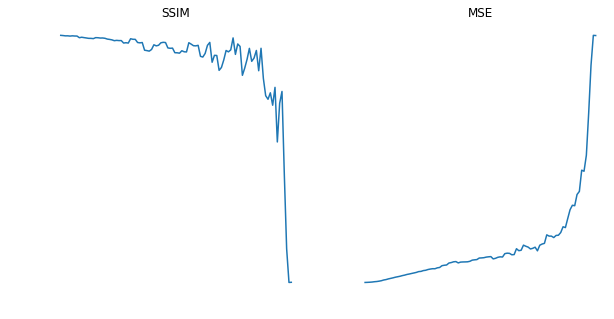

In [49]:
imgarray = pickle.load(open('../data/recorte_raw.pkl', 'rb'))
imgarray_adequada = adequacao_resolucao(imgarray)


Imagem_Adequada=Image.fromarray(imgarray_adequada)

tempfilename="../images/temp.jpg"
filetype="jpeg"
qualidade=100
quali_min=1
foradafaixa=0
ssim_list=[]
mse_list=[]
while (qualidade>0):
    Imagem_Adequada.save(tempfilename, filetype, quality=qualidade)
    ImagemTemp_jpeg = Image.open(tempfilename)
    arrayTemp_jpeg = np.array(ImagemTemp_jpeg)
    m = mse(imgarray, arrayTemp_jpeg)
    s = ssim(imgarray, arrayTemp_jpeg)
    
    ssim_list.append(s)
    mse_list.append(m)
    if (s<0.985555 and foradafaixa==0):
        foradafaixa=1
    else:
        if (foradafaixa==0):
            quali_min=qualidade
    qualidade-=1

fig=plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
plt.plot( ssim_list )
plt.axis("off")
plt.title("SSIM")

fig.add_subplot(1, 2, 2)
plt.plot( mse_list )
plt.title("MSE")

plt.axis("off")
    
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()

plt.show()

